In [2]:
from icevision.all import *
import pandas as pd

In [3]:
data_dir = Path('data')

In [4]:
data_dir.ls()

(#37) [Path('data/screen_4.png'),Path('data/screen_22.png'),Path('data/screen_2.png'),Path('data/screen_1.png'),Path('data/camImage.csv'),Path('data/panels3D.csv'),Path('data/faultsScreen.csv'),Path('data/screen_14.png'),Path('data/screen_5.png'),Path('data/screen_18.png')...]

In [5]:
faults_filepath = data_dir / 'faultsScreen.csv'

In [31]:
faults_df = pd.read_csv(faults_filepath, names=['img', 'panel', 'x', 'y', 'camera_distance', 'severity'])

In [32]:
faults_df.head()

,img,panel,x,y,camera_distance,severity
0,0,0,824.3546,120.6278,8.009512,1.463269
1,0,0,959.9281,183.6522,7.793197,2.783214
2,0,0,925.1127,207.0189,7.656076,2.186615
3,0,0,757.1481,145.2750,7.834614,0.909849
4,0,2,726.7522,466.8289,6.464667,1.051688


In [18]:
imgs_filepaths = get_image_files(data_dir)

In [50]:
# keep only the rows that have images
imgs_idxs = [int(o.stem.split('_')[-1]) for o in imgs_filepaths]
faults_df = faults_df.loc[faults_df['img'].isin(imgs_idxs)]

In [53]:
faults_df['img'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [71]:
y_correction = 768 / 3300

In [72]:
x_correction = 1096 / 2550

In [86]:
class ScreenFaultParser(parsers.Parser, parsers.FilepathMixin, parsers.BBoxesMixin, parsers.LabelsMixin):
    def __init__(self, data_dir):
        faults_filepath = data_dir / 'faultsScreen.csv'
        
        self.data_dir = data_dir
        self.faults_df = pd.read_csv(faults_filepath, names=['img', 'panel', 'x', 'y', 'camera_distance', 'severity'])
        
    def __iter__(self) -> Any:
        return faults_df.itertuples()
        
    def imageid(self, o) -> Hashable:
        return o.img
        
    def image_width_height(self, o) -> Tuple[int, int]:
        return get_image_size(self.filepath(o))
    
    def filepath(self, o) -> Union[str, Path]:
        return self.data_dir / f'screen_{o.img}.png'
        
    def labels(self, o) -> List[int]:
        return [1]
    
    def bboxes(self, o) -> List[BBox]:
        x = o.x
        y = o.y
        return [BBox.from_xyxy(x-1, y-1, x+1, y+1)]

In [87]:
parser = ScreenFaultParser(data_dir)

In [88]:
train_records, valid_records = parser.parse()

INFO     - Autofixing records | icevision.parsers.parser:parse:124
AUTOFIX-START - ️🔨  Autofixing record with imageid: 13  ️🔨 | icevision.core.record:_pre_replay:86
AUTOFIX-SUCCESS - Clipping bbox xmax from 1348.994 to image width 1096 (Before: <BBox (xmin:1346.994, ymin:355.1714, xmax:1348.994, ymax:357.1714)>) | icevision.core.bbox:autofix:79
AUTOFIX-FAIL - Cannot auto-fix coordinates: <BBox (xmin:1346.994, ymin:355.1714, xmax:1096, ymax:357.1714)>
	x_min:1346.994 is greater than or equal to x_max:1096 | icevision.core.record_mixins:_autofix:155
AUTOFIX-SUCCESS - Clipping bbox xmax from 1342.5179999999998 to image width 1096 (Before: <BBox (xmin:1340.5179999999998, ymin:497.1378, xmax:1342.5179999999998, ymax:499.1378)>) | icevision.core.bbox:autofix:79
AUTOFIX-FAIL - Cannot auto-fix coordinates: <BBox (xmin:1340.5179999999998, ymin:497.1378, xmax:1096, ymax:499.1378)>
	x_min:1340.5179999999998 is greater than or equal to x_max:1096 | icevision.core.record_mixins:_autofix:155
AUTOFIX

AUTOFIX-SUCCESS - Clipping bbox xmax from 1411.476 to image width 1096 (Before: <BBox (xmin:1409.476, ymin:423.6463, xmax:1411.476, ymax:425.6463)>) | icevision.core.bbox:autofix:79
AUTOFIX-FAIL - Cannot auto-fix coordinates: <BBox (xmin:1409.476, ymin:423.6463, xmax:1096, ymax:425.6463)>
	x_min:1409.476 is greater than or equal to x_max:1096 | icevision.core.record_mixins:_autofix:155
AUTOFIX-REPORT - Removed annotation with index: 0, for more info check the AUTOFIX-FAIL messages above | icevision.core.record:autofix:38
AUTOFIX-START - ️🔨  Autofixing record with imageid: 24  ️🔨 | icevision.core.record:_pre_replay:86
AUTOFIX-SUCCESS - Clipping bbox xmax from 1260.07 to image width 1096 (Before: <BBox (xmin:1258.07, ymin:362.5786, xmax:1260.07, ymax:364.5786)>) | icevision.core.bbox:autofix:79
AUTOFIX-FAIL - Cannot auto-fix coordinates: <BBox (xmin:1258.07, ymin:362.5786, xmax:1096, ymax:364.5786)>
	x_min:1258.07 is greater than or equal to x_max:1096 | icevision.core.record_mixins:_aut

AUTOFIX-SUCCESS - Clipping bbox xmax from 1209.402 to image width 1096 (Before: <BBox (xmin:1207.402, ymin:422.4213, xmax:1209.402, ymax:424.4213)>) | icevision.core.bbox:autofix:79
AUTOFIX-FAIL - Cannot auto-fix coordinates: <BBox (xmin:1207.402, ymin:422.4213, xmax:1096, ymax:424.4213)>
	x_min:1207.402 is greater than or equal to x_max:1096 | icevision.core.record_mixins:_autofix:155
AUTOFIX-REPORT - Removed annotation with index: 0, for more info check the AUTOFIX-FAIL messages above | icevision.core.record:autofix:38
AUTOFIX-START - ️🔨  Autofixing record with imageid: 14  ️🔨 | icevision.core.record:_pre_replay:86
AUTOFIX-SUCCESS - Clipping bbox xmax from 1343.275 to image width 1096 (Before: <BBox (xmin:1341.275, ymin:502.5413, xmax:1343.275, ymax:504.5413)>) | icevision.core.bbox:autofix:79
AUTOFIX-FAIL - Cannot auto-fix coordinates: <BBox (xmin:1341.275, ymin:502.5413, xmax:1096, ymax:504.5413)>
	x_min:1341.275 is greater than or equal to x_max:1096 | icevision.core.record_mixins

AUTOFIX-REPORT - Removed annotation with index: 0, for more info check the AUTOFIX-FAIL messages above | icevision.core.record:autofix:38
AUTOFIX-START - ️🔨  Autofixing record with imageid: 17  ️🔨 | icevision.core.record:_pre_replay:86
AUTOFIX-SUCCESS - Clipping bbox xmax from 1288.527 to image width 1096 (Before: <BBox (xmin:1286.527, ymin:507.5123, xmax:1288.527, ymax:509.5123)>) | icevision.core.bbox:autofix:79
AUTOFIX-FAIL - Cannot auto-fix coordinates: <BBox (xmin:1286.527, ymin:507.5123, xmax:1096, ymax:509.5123)>
	x_min:1286.527 is greater than or equal to x_max:1096 | icevision.core.record_mixins:_autofix:155
AUTOFIX-SUCCESS - Clipping bbox xmax from 1281.377 to image width 1096 (Before: <BBox (xmin:1279.377, ymin:451.8315, xmax:1281.377, ymax:453.8315)>) | icevision.core.bbox:autofix:79
AUTOFIX-FAIL - Cannot auto-fix coordinates: <BBox (xmin:1279.377, ymin:451.8315, xmax:1096, ymax:453.8315)>
	x_min:1279.377 is greater than or equal to x_max:1096 | icevision.core.record_mixins

AUTOFIX-START - ️🔨  Autofixing record with imageid: 21  ️🔨 | icevision.core.record:_pre_replay:86
AUTOFIX-SUCCESS - Clipping bbox xmax from 1270.019 to image width 1096 (Before: <BBox (xmin:1268.019, ymin:329.3951, xmax:1270.019, ymax:331.3951)>) | icevision.core.bbox:autofix:79
AUTOFIX-FAIL - Cannot auto-fix coordinates: <BBox (xmin:1268.019, ymin:329.3951, xmax:1096, ymax:331.3951)>
	x_min:1268.019 is greater than or equal to x_max:1096 | icevision.core.record_mixins:_autofix:155
AUTOFIX-REPORT - Removed annotation with index: 0, for more info check the AUTOFIX-FAIL messages above | icevision.core.record:autofix:38
AUTOFIX-START - ️🔨  Autofixing record with imageid: 19  ️🔨 | icevision.core.record:_pre_replay:86
AUTOFIX-SUCCESS - Clipping bbox xmax from 1212.7069999999999 to image width 1096 (Before: <BBox (xmin:1210.7069999999999, ymin:437.0965, xmax:1212.7069999999999, ymax:439.0965)>) | icevision.core.bbox:autofix:79
AUTOFIX-FAIL - Cannot auto-fix coordinates: <BBox (xmin:1210.7069

In [90]:
records = train_records[:6]

In [95]:
from copy import deepcopy

In [113]:
def fix_bbox(record, x_correction, y_correction):
    for bbox in record.bboxes:
        bbox.xmin *= x_correction
        bbox.ymin *= y_correction
        bbox.xmax = bbox.xmin + 1
        bbox.ymax = bbox.ymin + 1
#         bbox.xmax *= x_correction
#         bbox.ymax *= y_correction

In [ ]:
1096, 768

<AxesSubplot:>

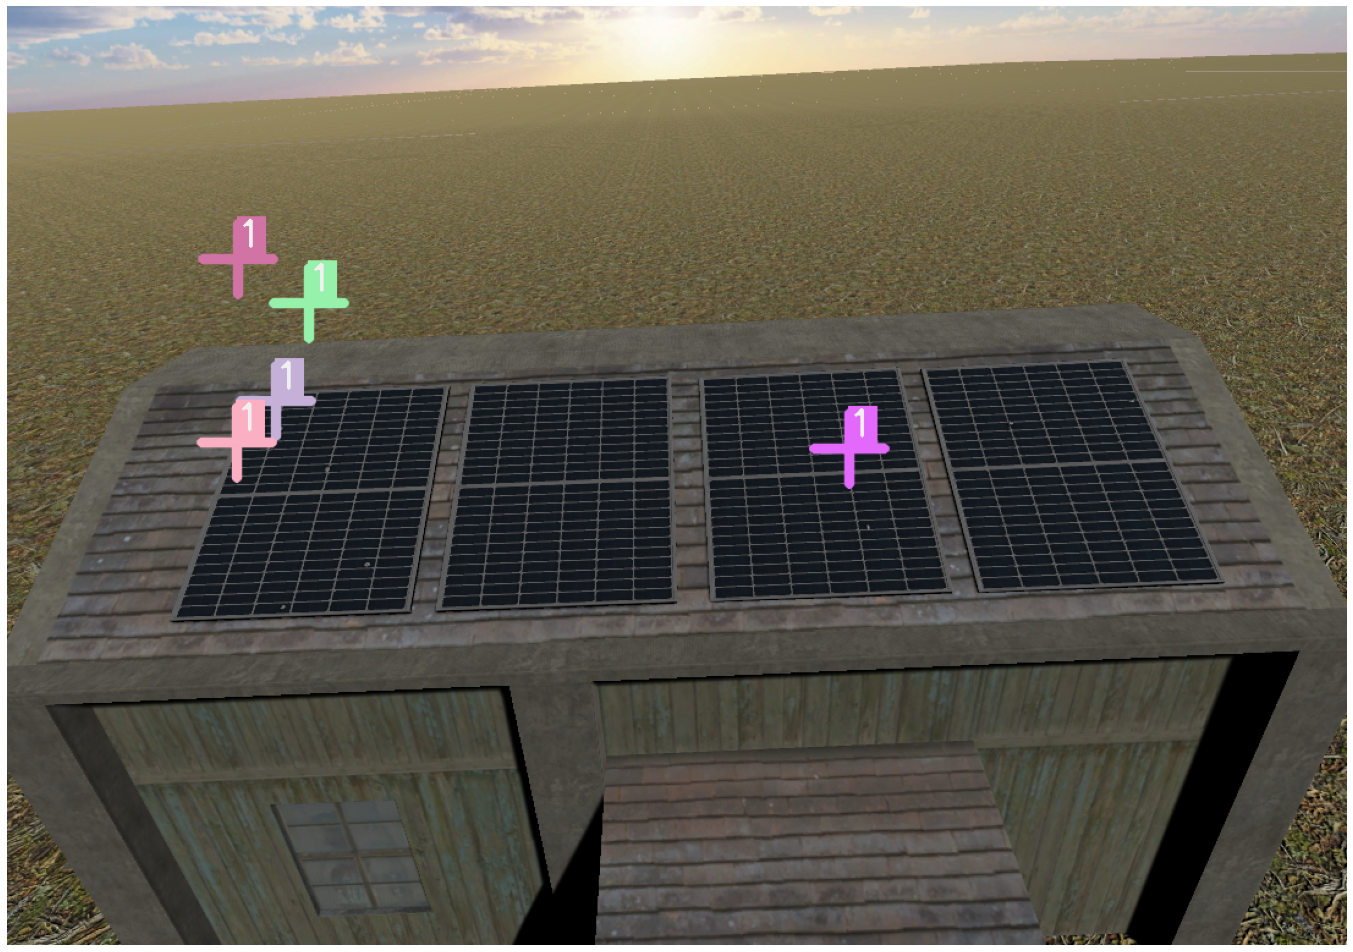

In [118]:
record = deepcopy(records[1])
fix_bbox(record, .57, .7)
img = draw_record(record)
show_img(img, figsize=(24, 24))

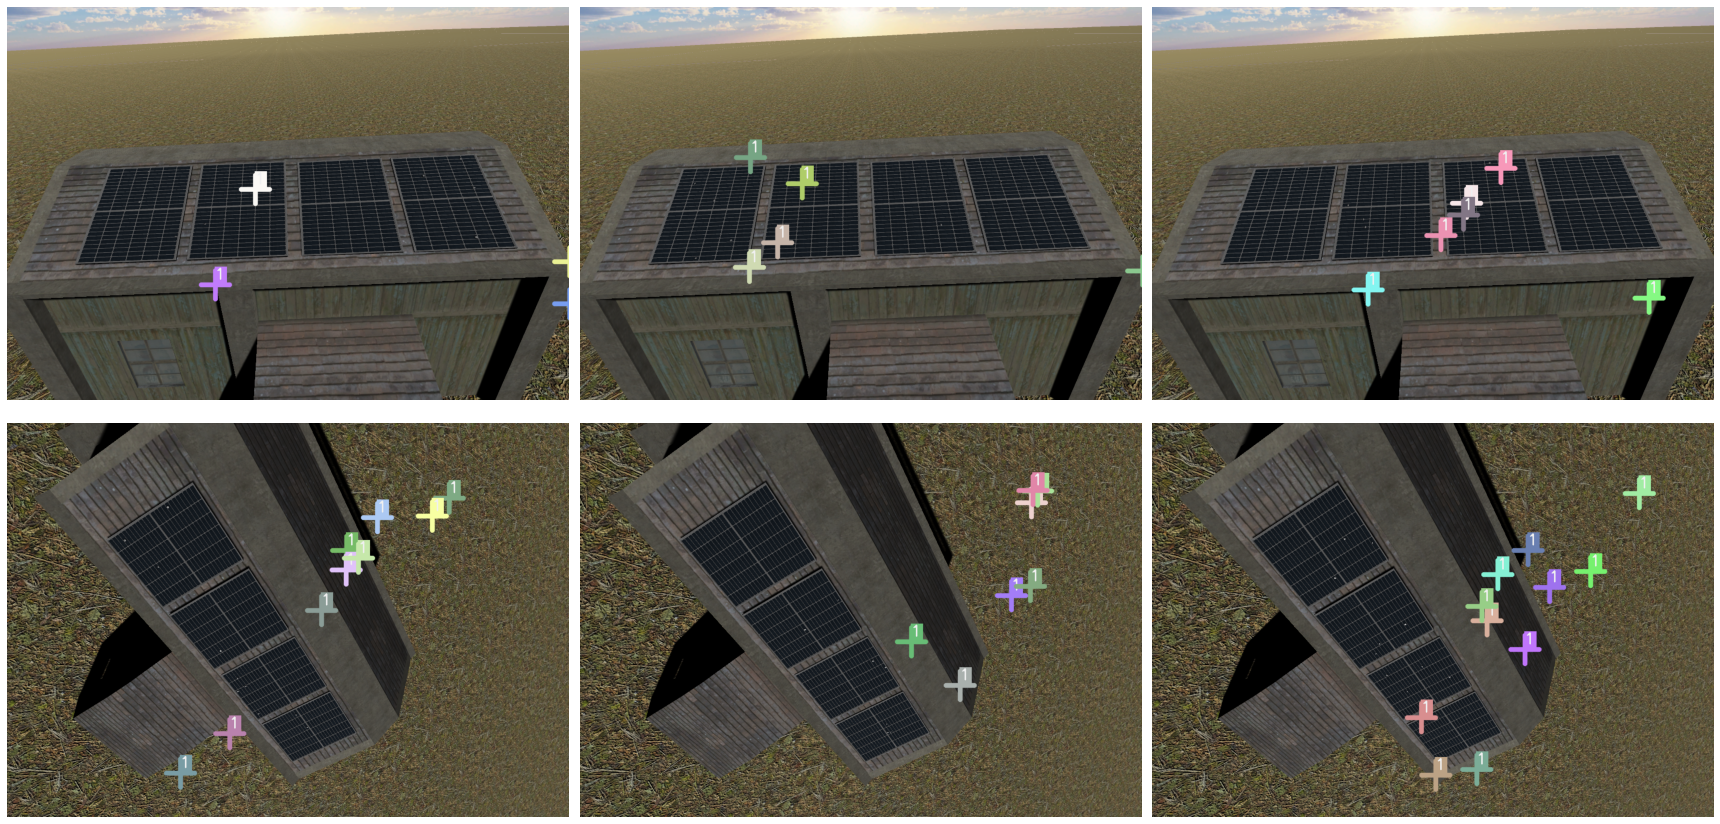

In [89]:
show_records(records, ncols=3)

In [73]:
faults_df['y'] * y_correction

0       28.073379
1       42.740876
2       48.178944
3       33.809455
4      108.643817
          ...    
235     96.413719
236    131.593425
237     75.929414
238     77.795398
239    117.806545
Name: y, Length: 240, dtype: float64

<AxesSubplot:>

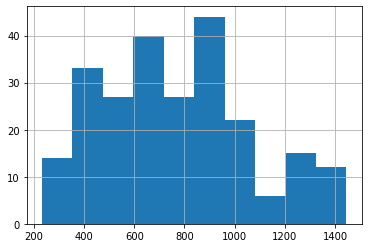

In [65]:
faults_df['x'].hist()

<AxesSubplot:>

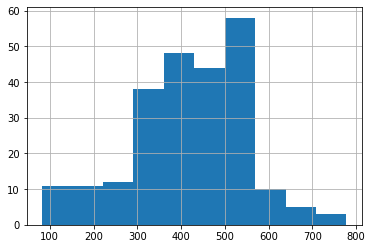

In [66]:
faults_df['y'].hist()

In [15]:
o = next(faults_df.itertuples())

In [17]:
bbox = BBox.from_xyxy(xmin=o.x-1, ymin=o.y-1, xmax=o.x+1, ymax=o.y+1)

,img,panel,x,y,idk,severity
0,0,0,824.3546,120.6278,8.009512,1.463269
1,0,0,959.9281,183.6522,7.793197,2.783214
2,0,0,925.1127,207.0189,7.656076,2.186615
3,0,0,757.1481,145.2750,7.834614,0.909849
4,0,2,726.7522,466.8289,6.464667,1.051688
...,...,...,...,...,...,...
235,29,0,1343.0090,414.2777,5.126160,2.170975
236,29,2,752.1426,565.4405,5.816671,0.775019
237,29,2,728.4114,326.2592,4.915110,1.394617
238,29,2,599.5492,334.2771,4.964421,2.059104
